In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Create initial Rewards And Update it For other Time Steps

In [7]:
#This will be the initial true mean for all our arms.
true_mean=np.random.randn(1)

true_mean_for_ten_arms= [true_mean]*10


# For Non constant Alpha

In [8]:

#if two arms have the same Q value, then we will prefer the arm at the lower index.
#players are independent of each other, hence we reset all values for every player.
#Assuming 'e' will only have 2 decimal points. ==> 0.xy or 0.x form only
e= 0.1

trials=5000
steps=1000

R_time=np.zeros((10,steps)) #Sum of reward for every arm over 2000 trials at every time step t.
N_time=np.zeros((10,steps)) #Number of times, an arm is picked at time 't' over all 2000 trials.



#Keep record of Rt for every player, so you can calculate average Rt.
Rt_for_every_player= np.zeros((trials,steps))

#Generate a list, to get explore ith probabilty 'e' and 'exploit' with probability '1-e'.

L=  ['exploit']*(int(100*(1-e))) + (['explore']*(int(100*e)))
random.shuffle(L)




for player in range(trials):
    
    N=[0]*10
    Q=[0]*10
    true_mean_for_ten_arms_update= true_mean_for_ten_arms.copy()
    
    for t in range(steps):
        
        what_to_do_pos= np.random.randint(100)
        what_to_do= L[what_to_do_pos]

        if(what_to_do=='exploit'):
            arm_to_pick= np.argmax(Q)

        else:
            arm_to_pick= np.random.randint(10)


        #Now we got our reward at time step t.
        Rt= np.random.normal(true_mean_for_ten_arms_update[arm_to_pick],1)

        #Now we update the Q value for this arm which we picked
        temp= Q[arm_to_pick]*N[arm_to_pick]
        temp+=Rt
        N[arm_to_pick]+=1
        Q[arm_to_pick]= temp/N[arm_to_pick]

        #Note the reward received at time 't' for every player.
        Rt_for_every_player[player][t]=Rt
        
        #For plotting expected value for every arm as a function of time steps.
        R_time[arm_to_pick][t]+=Rt
        N_time[arm_to_pick][t]+=1
        
       

        for k in range(10):
            true_mean_for_ten_arms_update[k]+= np.random.normal(0, 0.01)
            
        
        
        
                
                
                



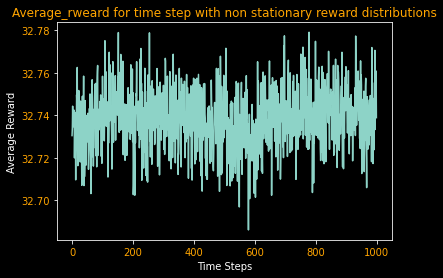

The method is performing soo poorly over a non stationary reward distribution. We never sort of saturate to higher average rewards


In [9]:
average_reward_list_0=[]
for t in range(steps):
    total_reward_at_t=0
    for player in range(trials):

        total_reward_at_t+=Rt_for_every_player[player][t]


    average_reward_at_t= total_reward_at_t/trials

    average_reward_list_0.append(average_reward_at_t)
plt.figure(0)
plt.style.use('dark_background')
plt.title('Average_rweard for time step with non stationary reward distributions', color='orange')
plt.yticks(color='orange')
plt.ylabel('Average Reward')
plt.xlabel('Time Steps')
plt.xticks(color='orange')
plt.plot(range(steps), average_reward_list_0)
plt.show()

print('The method is performing soo poorly over a non stationary reward distribution. We never sort of saturate to higher average rewards')

# For Constant alpha

In [10]:

#if two arms have the same Q value, then we will prefer the arm at the lower index.
#players are independent of each other, hence we reset all values for every player.
#Assuming 'e' will only have 2 decimal points. ==> 0.xy or 0.x form only
e= 0.1
a=0.1
trials=5000
steps=1000

R_time=np.zeros((10,steps)) #Sum of reward for every arm over 2000 trials at every time step t.
N_time=np.zeros((10,steps)) #Number of times, an arm is picked at time 't' over all 2000 trials.



#Keep record of Rt for every player, so you can calculate average Rt.
Rt_for_every_player= np.zeros((trials,steps))

#Generate a list, to get explore ith probabilty 'e' and 'exploit' with probability '1-e'.
L=  ['exploit']*(int(100*(1-e))) + (['explore']*(int(100*e)))
random.shuffle(L)


for players in range(trials):
    
    N=[0]*10
    
    Q=[1]*10
    
    
    true_mean_for_ten_arms_update= true_mean_for_ten_arms.copy()
    
    for t in range(steps):
        
        index_for_L= np.random.randint(len(L))
        what_to_do= L[index_for_L]
        
        if(what_to_do== 'explore'):
            At= np.random.randint(10)
            
        else:
            At= np.argmax(Q)
            
        
        Rt= np.random.normal(true_mean_for_ten_arms_update[At],1) #Get the reward Rt
        N[At]+=1                                                  #Increment the number of times, the arm has been picked.
        
        
        
        Rt_for_every_player[players][t]= Rt #Reward received by players at time step 't'
        
        R_time[At][t]+=Rt  #Total reward receievd by an arm at some time 't' over all trials
        N_time[At][t]+=1   #Total times an arm was picked over all trials at some time 't'.
        
        
       #Update Q value
    
        Q[At]= Q[At]+ (a*(Rt-Q[At])) 
        
    

            

    

        

c:\users\samak\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


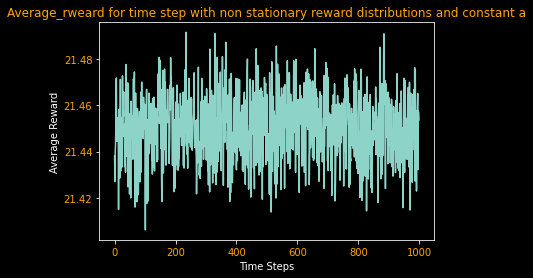

In [11]:
average_reward_list_1=[]
for t in range(steps):
    total_reward_at_t=0
    for player in range(trials):

        total_reward_at_t+=Rt_for_every_player[player][t]


    average_reward_at_t= total_reward_at_t/trials

    average_reward_list_1.append(average_reward_at_t)
plt.figure(0)
plt.style.use('dark_background')
plt.title('Average_rweard for time step with non stationary reward distributions and constant a', color='orange')
plt.yticks(color='orange')
plt.ylabel('Average Reward')
plt.xlabel('Time Steps')
plt.xticks(color='orange')
plt.plot(range(steps), average_reward_list_1)
plt.show()